In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salsabilaputri280","key":"934dddb29e3f33ea9316b0028d0712ba"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d elakiricoder/gender-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset
License(s): CC0-1.0
  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 50.8MB/s]


In [4]:
!mkdir gender-classification-dataset
!unzip gender-classification-dataset.zip -d gender-classification-dataset
!ls gender-classification-dataset

Archive:  gender-classification-dataset.zip
  inflating: gender-classification-dataset/gender_classification_v7.csv  
gender_classification_v7.csv


In [5]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [6]:
data = pd.read_csv('/content/gender-classification-dataset/gender_classification_v7.csv')

In [7]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [8]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.shape

(5001, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [11]:
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})

In [12]:
print(data['gender'].value_counts())

gender
1    2501
0    2500
Name: count, dtype: int64


In [13]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [15]:
X = data.drop('gender', axis=1)
y = data['gender']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


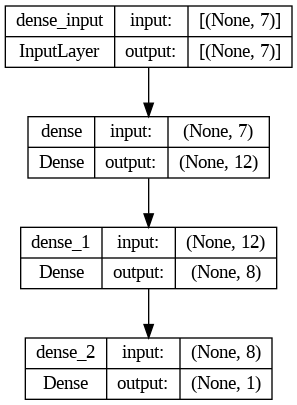

In [20]:
plot_model(model, show_shapes=True)

In [21]:
model.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
400/400 [==============================] - 1s 1ms/step - loss: 0.3822 - accuracy: 0.8965
Epoch 2/150
400/400 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9538
Epoch 3/150
400/400 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9503
Epoch 4/150
400/400 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9528
Epoch 5/150
400/400 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9513
Epoch 6/150
400/400 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9507
Epoch 7/150
400/400 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9513
Epoch 8/150
400/400 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9525
Epoch 9/150
400/400 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9542
Epoch 10/150
400/400 [==============================] - 0s 1ms/step - loss: 0.0934 - accura

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


32/32 [==============================] - 0s 977us/step - loss: 0.0854 - accuracy: 0.9690
Loss: 0.08543133735656738, Accuracy: 0.9690309762954712


In [23]:
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [24]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))


32/32 [==============================] - 0s 857us/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       499
           1       0.96      0.98      0.97       502

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [25]:
sample = [[1, 11.8, 6.1, 1, 0, 1, 1]]
prediction = model.predict(sample)
predicted_class = 'male' if prediction < 0.5 else 'female'
print(predicted_class)

1/1 [==============================] - 0s 56ms/step
male


In [26]:
sample = [[0,	14.0,	5.4,	0,	0,	1,	0]]
prediction = model.predict(sample)
predicted_class = 'male' if prediction < 0.5 else 'female'
print(predicted_class)

1/1 [==============================] - 0s 25ms/step
female


In [27]:
model.save('./uas.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
model = tf.keras.models.load_model('./uas.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./gender.tflite", "wb").write(tflite_model)

2900